# INDEX

[EDA and Data Preprocessing. Part 3](#EDA)

- [Departments](#Departments)
- [Aisles](#Aisles)
- [Products](#Products)
- [Exploring correlations](#Cor)
- [Statistical Analysis](#Stat)
<a id='INDEX'></a>

### EDA and Data Preprocessing. Part 3
<a id='EDA'></a>

In [3]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get rid of warning message
import warnings
warnings.filterwarnings('ignore')

Continue conducting EDA focusing on order items and department/isles of these products.

In [8]:
# Download the final train orders version of our dataframe - combined train dataset:
df_train = pd.read_csv('data/df_train.csv',index_col=0)

In [9]:
df_train

,product_id,add_to_cart_order,reordered,user_id,order_number,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
order_id,,,,,,,,,,,
1,49302,1,1,112108,4,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
816049,49302,7,1,47901,14,16.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1242203,49302,1,1,2993,15,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1383349,49302,11,1,41425,4,14.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1787378,49302,8,0,187205,5,30.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...
3420011,1528,12,0,177077,4,30.0,Sprinkles Decors,97,13,baking supplies decor,pantry
3420084,47935,20,0,9808,9,30.0,Classic Original Lip Balm SPF 12,73,11,facial care,personal care
3420084,9491,21,0,9808,9,30.0,Goats Milk & Chai Soap,25,11,soap,personal care


In [10]:
# Drop aisle_id and department_id columns:
df_train = df.drop(['aisle_id', 'department_id'], axis=1)
df_train

,product_id,add_to_cart_order,reordered,user_id,order_number,days_since_prior_order,product_name,aisle,department
order_id,,,,,,,,,
1,49302,1,1,112108,4,9.0,Bulgarian Yogurt,yogurt,dairy eggs
816049,49302,7,1,47901,14,16.0,Bulgarian Yogurt,yogurt,dairy eggs
1242203,49302,1,1,2993,15,7.0,Bulgarian Yogurt,yogurt,dairy eggs
1383349,49302,11,1,41425,4,14.0,Bulgarian Yogurt,yogurt,dairy eggs
1787378,49302,8,0,187205,5,30.0,Bulgarian Yogurt,yogurt,dairy eggs
...,...,...,...,...,...,...,...,...,...
3420011,1528,12,0,177077,4,30.0,Sprinkles Decors,baking supplies decor,pantry
3420084,47935,20,0,9808,9,30.0,Classic Original Lip Balm SPF 12,facial care,personal care
3420084,9491,21,0,9808,9,30.0,Goats Milk & Chai Soap,soap,personal care


## Departments analysis
<a id='Departments'></a>

In [5]:
#Filter departments by frequency:
department_counts = df_train["department"].value_counts()
department_counts

department
produce            409087
dairy eggs         217051
snacks             118862
beverages          114046
frozen             100426
pantry              81242
bakery              48394
canned goods        46799
deli                44291
dry goods pasta     38713
household           35986
meat seafood        30307
breakfast           29500
personal care       21570
babies              14941
international       11902
missing              8251
alcohol              5598
pets                 4497
other                1795
bulk                 1359
Name: count, dtype: int64

In [6]:
# See this data in percentage ratio:
df_train.department.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

department
produce            29.5%
dairy eggs         15.7%
snacks              8.6%
beverages           8.2%
frozen              7.3%
pantry              5.9%
bakery              3.5%
canned goods        3.4%
deli                3.2%
dry goods pasta     2.8%
household           2.6%
meat seafood        2.2%
breakfast           2.1%
personal care       1.6%
babies              1.1%
international       0.9%
missing             0.6%
alcohol             0.4%
pets                0.3%
other               0.1%
bulk                0.1%
Name: proportion, dtype: object

We can see that 'produce' is the department with the highest number of ordered products, followed by 'dairy eggs' and 'snacks'. Departments like 'bulk', 'other', 'pets', and 'alcohol' have relatively few orders compared to the others.

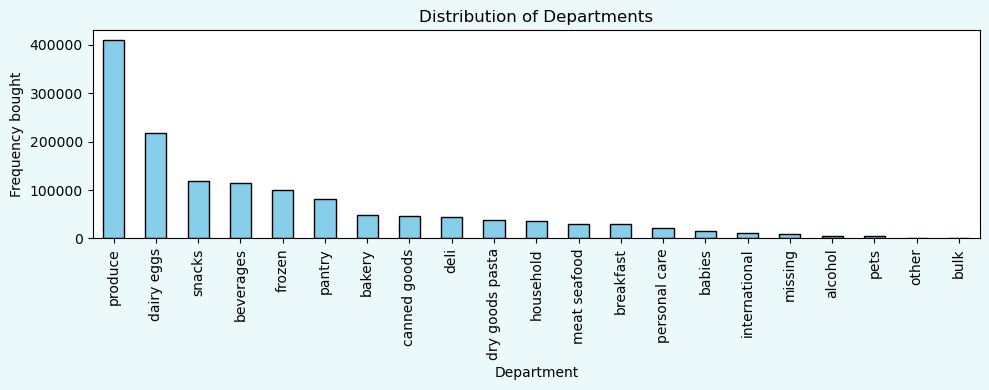

In [7]:
#Build a graph to see the distribution of Departments by total orders:
plt.figure(figsize=(10, 4))
department_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('#EBF9FB')

# Set the titles and labels
plt.ylabel("Frequency bought")
plt.xlabel('Department')
plt.title('Distribution of Departments')
plt.xticks(rotation=90)
plt.tight_layout()

The data spans a large range of values. Produce is top first department by far overcovering other departments. Produce is the most popular department among shoppers. This is followed by 'dairy eggs' and 'snacks', which also show a significant number of purchases. Other departments like 'bakery', 'pantry', and 'frozen' have moderate purchase frequencies.

/Users/dariiav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dariiav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dariiav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dariiav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

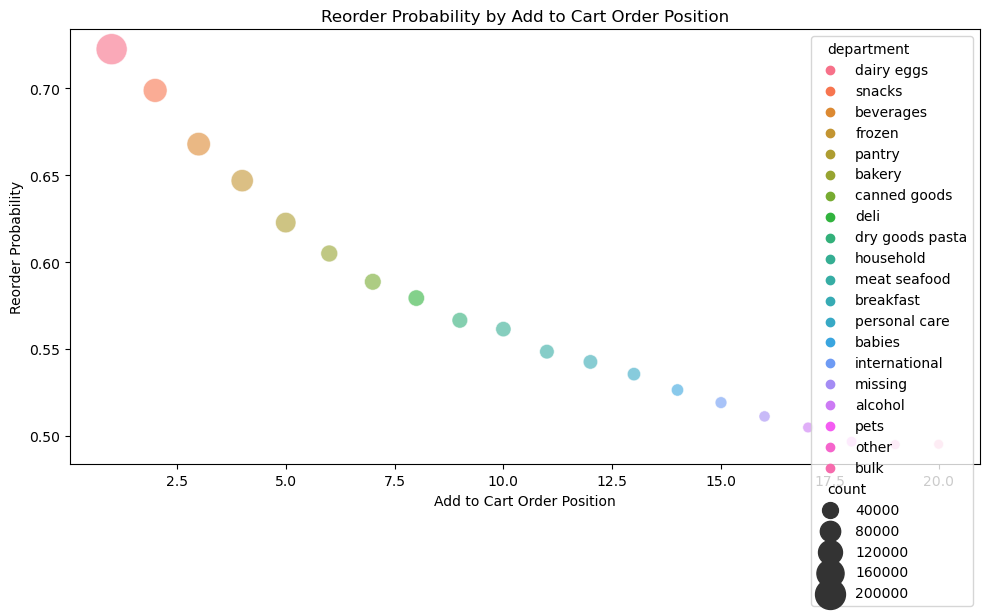

In [8]:
# Visualize the relationship between when an item is added to the cart and its reorder probability, along with the volume of purchases per department.
# Calculate the reorder probability for each add_to_cart_order position
reorder_prob_by_add_to_cart = df_train.groupby('add_to_cart_order')['reordered'].mean()

# Calculate the total count for each department
department_counts = df_train['department'].value_counts().reset_index()
department_counts.columns = ['department', 'count']

# Merge the reorder probability with department counts
merged_df = pd.merge(reorder_prob_by_add_to_cart, department_counts, how='left', left_on='add_to_cart_order', right_index=True)

# Now we can plot using the merged DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="add_to_cart_order", y="reordered", size="count", hue="department", sizes=(50, 500), alpha=0.6)

# Set titles and labels
plt.title('Reorder Probability by Add to Cart Order Position')
plt.xlabel('Add to Cart Order Position')
plt.ylabel('Reorder Probability')
plt.tight_layout()

The reorder probability decreases as the add-to-cart order position increases.
Dairy eggs, snacks, beverages, frozen, pantry and bakery have the highest reorder probability and add to cart position:

First position: 72.26%
Second position: 69.89%
Third position: 66.80%
Fourth position: 64.69%
Fifth position: 62.28%
Sixth position: 60.50%

Products added earlier in the shopping process have a higher probability of being reordered. 

## Aisles analysis
<a id='Aisles'></a>

In [9]:
# Lets see top 10 most popular aisles:
df_train["aisle"].value_counts()

aisle
fresh vegetables              150609
fresh fruits                  150473
packaged vegetables fruits     78493
yogurt                         55240
packaged cheese                41699
                               ...  
kitchen supplies                 448
baby bath body care              328
baby accessories                 306
frozen juice                     294
beauty                           287
Name: count, Length: 134, dtype: int64

In [10]:
# Lets see this data in percentage ratio:
df_train.aisle.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

aisle
fresh vegetables              10.9%
fresh fruits                  10.9%
packaged vegetables fruits     5.7%
yogurt                         4.0%
packaged cheese                3.0%
                              ...  
kitchen supplies               0.0%
baby bath body care            0.0%
baby accessories               0.0%
frozen juice                   0.0%
beauty                         0.0%
Name: proportion, Length: 134, dtype: object

Fresh and packaged vegetables and fruits are the most popular aisles per total number of orders.This indicates that customers using the Instacart platform prioritize fresh and healthy food options. 

Dairy products like yogurt, cheese, and milk also rank highly, suggesting these are staple items in many shoppers' lists. 

The presence of snack-related aisles such as chips and pretzels, as well as bread and lactose-free options, reflects a variety of dietary preferences and needs. The popularity of these aisles could guide inventory management, store layout decisions, and promotional activities. 

### Lets check and compare the reorder data per aisle:
This will help us understand which aisles have the highest proportion of reordered items.

In [11]:
# Calculate the reorder frequency of products in different aisles. 

col1 = "aisle"
col2 = "reordered"

# Calculate the total count per aisle and the count of reordered items per aisle
total_count = df_train.groupby(col1)[col2].count()
reorder_count = df_train[df_train[col2] == 1].groupby(col1)[col2].count()

aisle_rate = reorder_count / total_count

# Get the top 25 aisles with the highest reorder rate
top_aisle_rate = aisle_rate.sort_values(ascending=False).head(25)
top_aisle_rate

aisle
milk                             0.792305
water seltzer sparkling water    0.737663
fresh fruits                     0.736225
eggs                             0.728956
packaged produce                 0.717459
cream                            0.688734
soy lactosefree                  0.687729
yogurt                           0.686803
white wines                      0.683824
bread                            0.680051
packaged vegetables fruits       0.656402
refrigerated                     0.655674
breakfast bakery                 0.653335
tofu meat alternatives           0.652352
cat food care                    0.652340
frozen breakfast                 0.650118
soft drinks                      0.649610
energy sports drinks             0.646563
poultry counter                  0.636713
trail mix snack mix              0.636364
prepared meals                   0.633680
packaged poultry                 0.633559
mint gum                         0.619543
fresh dips tapenades        

<Figure size 1000x800 with 0 Axes>

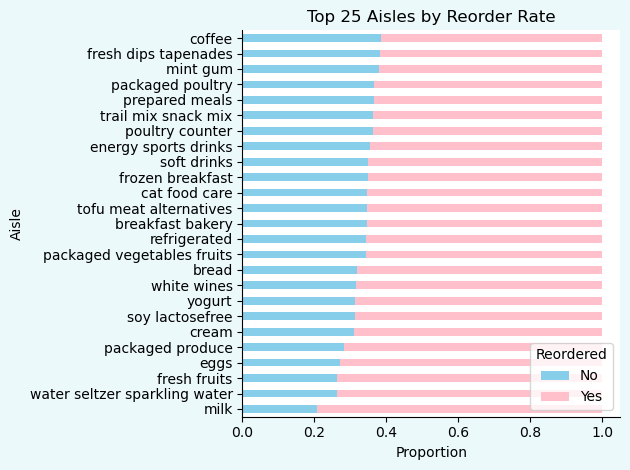

In [12]:
# Visualize these data in a form of a stacked bar plot. 
# This will help us understand which aisles have the highest proportion of reordered items. 

plt.figure(figsize=(10, 8))

# Create a DataFrame suitable for a stacked bar plot
stacked_data = df_train.groupby(col1)[col2].value_counts(normalize=True).unstack(col2).loc[top_aisle_rate.index]

# Create a stacked bar plot
stacked_data.plot(kind="barh", stacked=True, color=["skyblue", "pink"])

# Set titles and labels
plt.title(f"Top 25 Aisles by Reorder Rate")
plt.xlabel("Proportion")
plt.ylabel("Aisle")
sns.despine()
plt.legend(['No', 'Yes'], title='Reordered', loc='lower right')
plt.gcf().set_facecolor('#EBF9FB')
plt.tight_layout()

Aisles like 'milk', 'water seltzer sparkling water' and 'fresh fruits' show particularly high reorder ratios.

## Products
<a id='Products'></a>

In [13]:
# Lets see top 10 most sold products:
df_train["product_name"].value_counts().head(10)

product_name
Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: count, dtype: int64

The list of most sold products is dominated by fresh fruit and vegetables, with bananas and organic bananas leading the list. This might be due to their popularity as a versatile, healthy snack, as well as being a common ingredient in many recipes. 

Organic options are particularly prevalent, highlighting a consumer trend towards organic produce.

The presence of several berry types and avocados suggests that customers have a preference for foods that are considered 'superfoods'.

In [14]:
# Lets see this data in percentage ratio:
df_train.product_name.value_counts(normalize=True).head(10).mul(100).round(1).astype(str) + '%'

product_name
Banana                    1.4%
Bag of Organic Bananas    1.1%
Organic Strawberries      0.8%
Organic Baby Spinach      0.7%
Large Lemon               0.6%
Organic Avocado           0.5%
Organic Hass Avocado      0.5%
Strawberries              0.5%
Limes                     0.4%
Organic Raspberries       0.4%
Name: proportion, dtype: object

There are 49677 types of products with Organic and Health-oriented fruits and vegetables strong consumer preference. 

Bananas, Bag of Organic Bananas, Organic Strawberries and Organic Baby Spinach are the most common products. A few products, particularly bananas and organic variants, dominate the dataset, suggesting their high sales frequency (1.4% + 1.1% = 2.5%).

There's also a long tail of products with minimal occurrence, highlighting a diverse but unevenly distributed product range.

### Lets check the reorder ratio per product:

In [15]:
# Calculate the proportion of the reordered products:
col1 = "product_name"
col2 = "reordered"

rate_data_p = df_train.groupby([col1, col2])[col2].count() / df_train.groupby(col1)[col2].count()

# Filter to only include cases where reordered is 1
reorder_rates = rate_data_p.xs(1, level='reordered')

# Sort and get the top 10 products with the highest reorder ratio
top_25_products = reorder_rates.sort_values(ascending=False).head(25)
top_25_products

product_name
Heat-N-Go! Maple Burst'n Mini Pancakes             1.0
Lightly Salted Pistachios                          1.0
Lightly Sea Salted Potato Chips                    1.0
Cheddar Baked Mini Snack Crackers                  1.0
Lightly Sweet Chai Skinny Latte                    1.0
Lil Bits Banana Strawberry Oatmeal                 1.0
Lil' Pastas Ravioli, Cheese and Spinach            1.0
Chaumes Cheese                                     1.0
Lime Beer                                          1.0
Chardonnay Sonoma Coast 2008                       1.0
Chardonnay Santa Barbara County 2005               1.0
Lime Chili Flavor with Shrimp Instant Lunch        1.0
Strawberry from Concentrate Nectar                 1.0
Vermont White Cheddar Mac & Cheese                 1.0
Lime Tangerine Yerba Mate Shot                     1.0
Strawberry Whole Milk Yogurt                       1.0
Linen Scent Bleach With Fabric Protection          1.0
Lip Balm - Pomegranate                             1

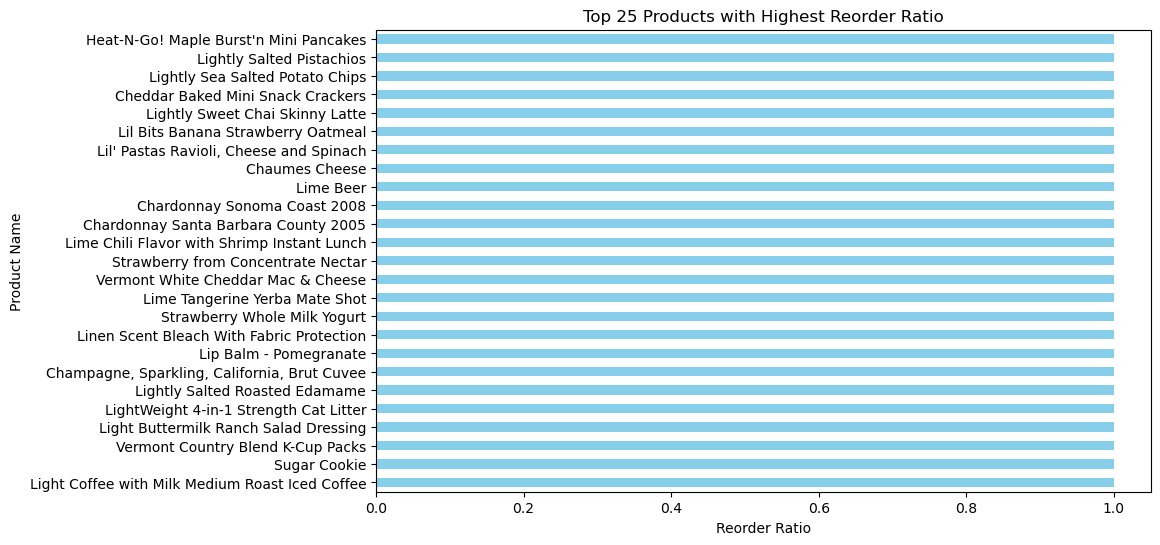

In [16]:
# Let's visualize these data in a form of a plot:
plt.figure(figsize=(10, 6))
top_25_products.plot(kind="barh", color="skyblue")
plt.title("Top 25 Products with Highest Reorder Ratio")
plt.xlabel("Reorder Ratio")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest at the top

The products with the highest reorder ratios appear to be niche items that, when purchased, are likely to be bought again. 
This could suggest high customer satisfaction with these products, or it could be indicative of loyal customer bases for these specific goods. 

It's worth noting that a reorder ratio of 1.0 could also be due to a low sample size; if the product was only ordered once and then reordered once, it would have a perfect reorder ratio. 

Therefore, while the high reorder ratio is indicative of repeat purchase behavior, the absolute volume of sales should also be considered to determine the significance of the reorder ratio. Lets calculate:

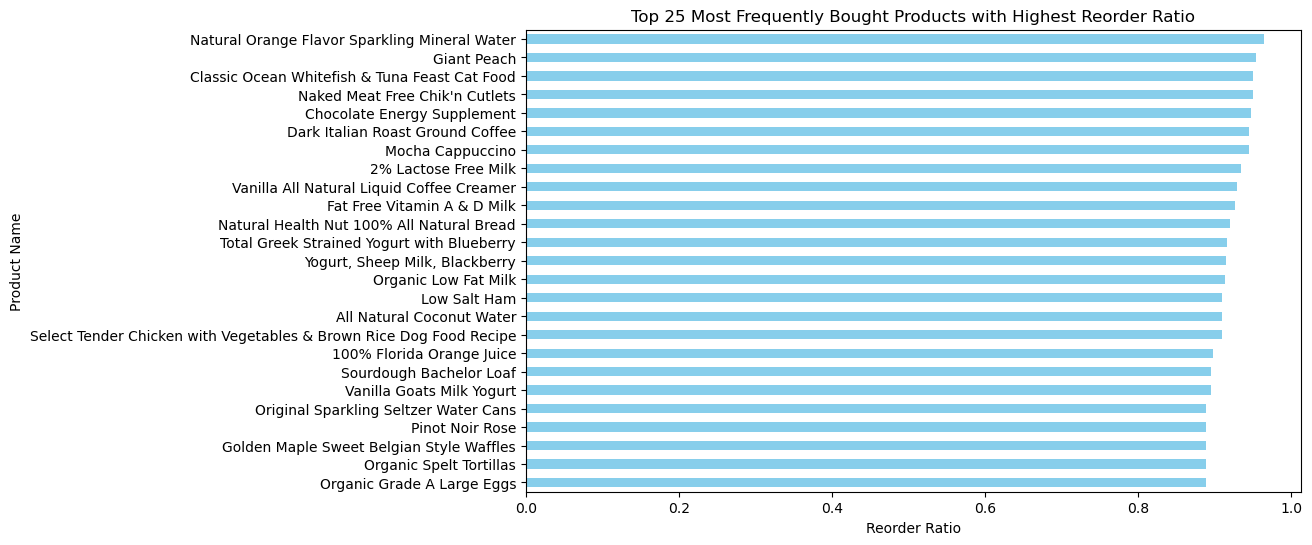

In [17]:
# Calculate the total frequency of each product being bought
product_frequency = df_train['product_name'].value_counts()

# Filter out the top 25% most frequently bought products
threshold = product_frequency.quantile(0.75)  # Finds the 75th percentile value
top_25_percent_products = product_frequency[product_frequency >= threshold].index

# Next, we filter the reorder_rates to include only those top 25% products
top_25_percent_reorder_rates = reorder_rates[reorder_rates.index.isin(top_25_percent_products)]

# Sort these filtered products by their reorder ratio
top_25_products_by_reorder_ratio = top_25_percent_reorder_rates.sort_values(ascending=False).head(25)

# Visualize these top 25 products
plt.figure(figsize=(10, 6))
top_25_products_by_reorder_ratio.plot(kind="barh", color="skyblue")
plt.title("Top 25 Most Frequently Bought Products with Highest Reorder Ratio")
plt.xlabel("Reorder Ratio")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest at the top

Products that have made it to this list include a mix of beverages (like Natural Orange Flavor Sparkling Mineral Water, Giant Peach juice, and 100% Florida Orange Juice), dairy and dairy substitute products (such as various types of milk and yogurt), and specific grocery items like coconut water and different kinds of bread.

These items are likely to be staples in customers' diets, suggesting that once a customer starts buying them, they continue to do so regularly. This could be due to the products' quality, a lack of close substitutes, or customer habits. For Instacart or similar platforms, ensuring the continuous availability and possibly offering promotions for these items could be beneficial, as they are not only popular but also have a high retention rate.

Given their high reorder ratios, these products may have a strong customer loyalty and can be succesfully shown to customers by the recommendation algoritm.

---
<a id='Cor'></a>

## Exploring correlations
Let's explore correlations between all the  variables.
It will give us an understanding of how our variables vary with respect to another.

In [31]:
df_num = df.select_dtypes(include=['number'])

In [32]:
# Let's get the correlation matrix and save to variable 'corr_mat'
corr_mat = df_num.corr()
corr_mat

,product_id,add_to_cart_order,reordered,user_id,order_number,days_since_prior_order,aisle_id,department_id
product_id,1.000000,0.003128,0.006560,-0.001014,-0.001463,0.001036,-0.001932,-0.027212
add_to_cart_order,0.003128,1.000000,-0.146393,0.000739,0.014332,0.017283,0.010887,0.027428
reordered,0.006560,-0.146393,1.000000,-0.004316,0.223947,-0.160152,-0.000172,-0.050294
user_id,-0.001014,0.000739,-0.004316,1.000000,-0.003715,0.003854,0.000972,-0.000548
order_number,-0.001463,0.014332,0.223947,-0.003715,1.000000,-0.403861,-0.002022,-0.001568
days_since_prior_order,0.001036,0.017283,-0.160152,0.003854,-0.403861,1.000000,0.006088,0.005045
aisle_id,-0.001932,0.010887,-0.000172,0.000972,-0.002022,0.006088,1.000000,0.061357
department_id,-0.027212,0.027428,-0.050294,-0.000548,-0.001568,0.005045,0.061357,1.000000


<Axes: >

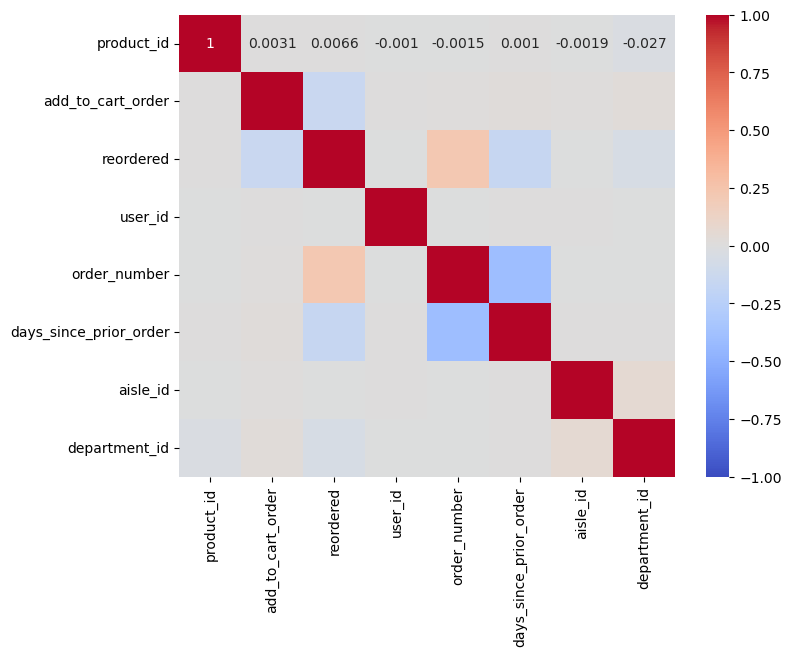

In [33]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, cmap="coolwarm", vmin=-1, vmax=1, center=0, annot=True)

Findings:

days_since_prior_order and order_number (-0.403861): There is a moderate negative correlation between the number of days since the prior order and the order number. 


reordered and order_number (0.223947): There is a moderate positive correlation here, indicating that as the number of orders increases (i.e., the more a user orders), the likelihood of reordering items increases. 

add_to_cart_order and reordered (-0.146393): There is a weak negative correlation between the order in which items are added to the cart and their likelihood of being reordered.

The most significant findings are related to reorder habits and order frequency. As expected, there is no meaningful correlation between user IDs and other variables, confirming that the user's identity number is arbitrary and does not influence ordering patterns. The correlations involving **order_number** are the most telling, as they reflect customer engagement and shopping habits.

### Statistical Analysis
<a id='Stat'></a>

Running Logistic regression with classification report and confusion matrix. 

The classification report provides key metrics such as precision, recall, f1-score, and accuracy, while the confusion matrix gives a detailed breakdown of the prediction results:

In [ ]:
# import required libraries:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target variable for logistic regression
X = df_num.drop(['reordered'], axis=1)  # Dropping target column
y = df_num['reordered']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

#Scale data
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [49]:
# Initialize the logistic regression model
logistic_model = LogisticRegression(C = 0.1)

# Fit the model to the training data
logistic_model.fit(X_train_ss, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test_ss)

# Generate and print a classification report to evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.61      0.34      0.44    111074
           1       0.66      0.85      0.74    165850

    accuracy                           0.65    276924
   macro avg       0.63      0.60      0.59    276924
weighted avg       0.64      0.65      0.62    276924

[[ 38053  73021]
 [ 24531 141319]]


In [50]:
# Training and test score
print(f"Train score: {logreg.score(X_train_ss, y_train)}")
print(f"Test score: {logreg.score(X_test_ss, y_test)}")

Train score: 0.6480956366068937
Test score: 0.6477300631220119


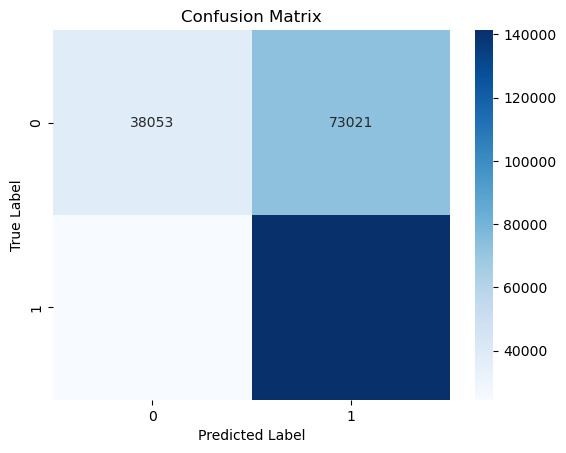

Text(0, 0.5, 'Score')

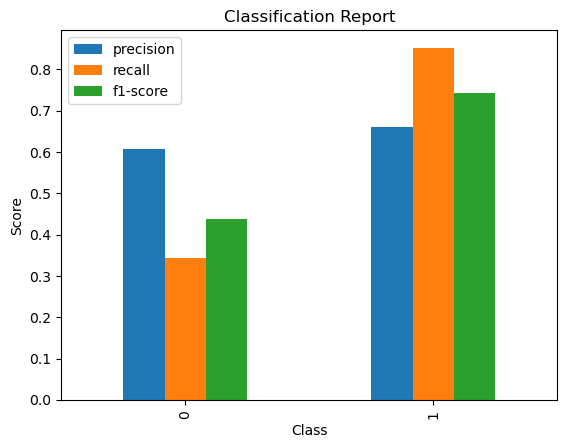

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred are available from your logistic regression model

# Confusion Matrix Visualization
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[:-3].plot(kind='bar', y=['precision', 'recall', 'f1-score'])
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')

FOR NOT REORDERED:

Precision for class 0 (not reordered) is 0.61, meaning that when the model predicts a product is not reordered, it is correct 61% of the time.

Recall for class 0 is 0.34, indicating that the model correctly identifies 34% of the actual not reordered cases.

F1-score for class 0 is 0.44, which is a weighted average of precision and recall for class 0, suggesting that the model is not performing well at identifying not reordered cases.

FOR REORDERED:

Precision is 0.66, meaning the model's prediction of a product being reordered is correct 66% of the time.

Recall is 0.85, showing that the model identifies 85% of all actual reordered cases.

F1-score is 0.74, indicating a relatively higher performance of the model in identifying reordered cases compared to not reordered cases.

Accuracy of the model is 0.65, meaning it correctly predicts the reordered status for 65% of the products overall.

SUMMARY:

The model is better at identifying products that will be reordered than those that will not. This could be because there are more reordered instances in the dataset (evidence of class imbalance), or the features are more predictive for the reordered class. 
The relatively high number of False Positives (products predicted as reordered but actually not) suggests that the model might be erring on the side of predicting reorder. 

This could be addressed by looking into the model's threshold for classification or gathering more distinguishing features. 

The accuracy is moderately good, but there is definitely room for improvement, especially in terms of precision and recall for the not reordered class.

Next step would be run bag of words in order to convert non-numeric values and include it into our model.

### [BACK TO INDEX](#INDEX)